In [8]:
import pandas as pd 
kto_201901 = pd.read_excel('./files/kto_201901.xlsx', 
header=1, # 첫줄생략
usecols='A:G',
skipfooter=4)
kto_201901.head()


,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [9]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [11]:
kto_201901.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [12]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [16]:
condition = (kto_201901['관광'] == 0) | (kto_201901['상용'] == 0) |(kto_201901['공용'] == 0) | (kto_201901['유학/연수'] == 0)
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [17]:
kto_201901['기준년월']  = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [22]:
kto_201901['국적'].unique()


array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [23]:
continents_list = ['아시아주', '미주', '구주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '아프리카주', '기타대륙', '교포소계']

In [25]:
condition = (kto_201901.국적.isin(continents_list) == False)
# condition
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [28]:
kto_201901_country.head(15)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01
6,말레이시아,19043,95,7,99,2821,22065,2019-01
7,필리핀,14279,211,161,184,15638,30473,2019-01
8,인도네시아,14183,136,38,187,4298,18842,2019-01
9,싱가포르,8372,94,8,48,1333,9855,2019-01
10,미얀마,1304,10,31,67,3877,5289,2019-01


In [29]:
kto_201901_country.tail(15)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
49,우크라이나,593,58,3,28,1580,2262,2019-01
50,러시아,17260,181,37,191,7525,25194,2019-01
51,크로아티아,226,12,0,3,250,491,2019-01
52,루마니아,412,8,4,3,445,872,2019-01
53,불가리아,154,1,1,10,265,431,2019-01
54,폴란드,713,10,0,27,574,1324,2019-01
55,구주 기타,1809,44,25,91,996,2965,2019-01
56,대양주,15379,116,38,39,2052,17624,2019-01
57,오스트레일리아,12795,93,17,34,1346,14285,2019-01
58,뉴질랜드,2029,20,17,5,654,2725,2019-01


In [44]:
# 인덱스 재설정 – 데이터 필터링 시 인덱스 누락이 발생하기 때문에 초기화 해주는 것이 좋다.

kto_201901_country_newindex = kto_201901_country.reset_index(drop=True) 
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [90]:
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [91]:
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', 
'교포소계']
continents_list # 대륙목록 생


['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [92]:
# kto_201901 데이터의 국적 칼럼에서 continents_list 에 포함되지 않는 국가만 선택
condition = (kto_201901.국적.isin(continents_list) == False) 
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [93]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [94]:
# 인덱스 재설정 – 데이터 필터링 시 인덱스 누락이 발생하기 때문에 초기화 해주는 것이 좋다.
kto_201901_country_newindex = kto_201901_country.reset_index(drop=True) 
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [95]:
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 \
+ ['아프리카']*2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [97]:
# 대륙 칼럼 생성
kto_201901_country_newindex['대륙'] = continents

In [98]:
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [99]:
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


In [100]:
kto_201901_country_newindex['관광객비율(%)'] = \
round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100)

kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.0
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.0
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,97.0
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,98.0
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.0


In [101]:
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending=True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,12.0
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.0
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.0
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,24.0


In [103]:
# 대륙별 관광객 비율의 평균
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)',
index = '대륙',
aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.000000
아메리카,68.200000
아시아,59.560000
아프리카,33.000000
오세아니아,84.666667
유럽,63.869565


In [115]:
def create_kto_data(yy,mm) :
    file_path = './files/kto_{}{}.xlsx'.format(yy,mm)
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    df['기준년월'] = '{} -{}'.format(yy,mm)
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'] # 제거할 대륙명 선정하기
    condition = (df['국적'].isin(ignore_list) == False) # 대륙 미포함 조건
    df_country = df[condition].reset_index(drop=True) 
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포'] 
    df_country['대륙'] = continents
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1)
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    return(df_country)

In [116]:
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018 -12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018 -12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018 -12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018 -12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018 -12,아시아,87.4,4.2


In [117]:
for yy in range(2010, 2021) :
    for mm in range(1, 13) :
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy,mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [144]:
# 통합데이터 생성하기
df = pd.DataFrame()

# 패턴분석결과를 이중반복문을 통해 구현
for yy in range(2010, 2021) :
    for mm in range(1, 13) :
        try:
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index=True)

        except:
                pass

C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Tem

C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Tem

C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Tem

C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Temp\ipykernel_51264\3464732474.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index=True)
C:\Users\lullu\AppData\Local\Tem

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7920 non-null   object 
 1   관광        7920 non-null   int64  
 2   상용        7920 non-null   int64  
 3   공용        7920 non-null   int64  
 4   유학/연수     7920 non-null   int64  
 5   기타        7920 non-null   int64  
 6   계         7920 non-null   int64  
 7   기준년월      7920 non-null   object 
 8   대륙        7920 non-null   object 
 9   관광객비율(%)  7919 non-null   float64
 10  전체비율(%)   7920 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 680.8+ KB


In [146]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010 -01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010 -01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010 -01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010 -01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010 -01,아시아,75.1,3.3


In [147]:
df.to_excel('./files/kio_total_2023.xlsx', index = False)

In [148]:
# 데이터시각화

In [149]:
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')


In [150]:
import matplotlib.pyplot as plt 

In [151]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010 -01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010 -02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010 -03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010 -04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010 -05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
7637,중국,212,264,6,6766,9027,16275,2020 -08,아시아,1.3,2.5
7697,중국,481,260,28,5717,8821,15307,2020 -09,아시아,3.1,4.5
7757,중국,367,243,2,1287,9578,11477,2020 -10,아시아,3.2,3.3
7817,중국,382,327,5,1285,7175,9174,2020 -11,아시아,4.2,3.3


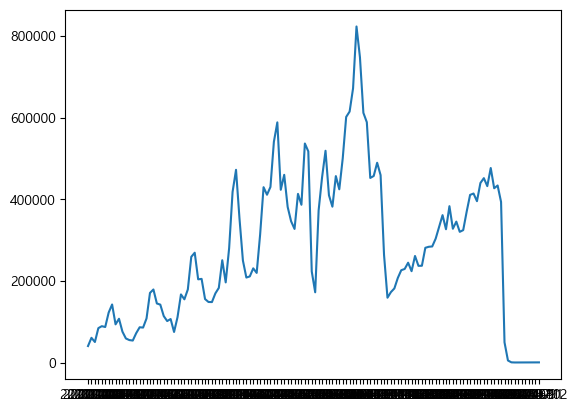

In [152]:
# 시계열그래프 그리기 # 기준년월 X축, 관광 Y축

plt.plot(df_filter['기준년월'], df_filter['관광']) 

plt.show()

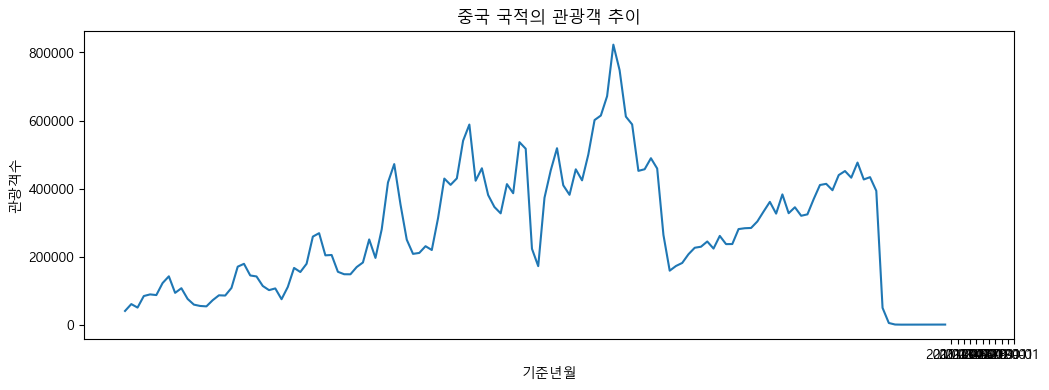

In [153]:
# 그래프 크기 조절
plt.figure(figsize = (12, 4))

plt.plot(df_filter['기준년월'], df_filter['관광'])

plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

# 그래프 표현하기
plt.show()

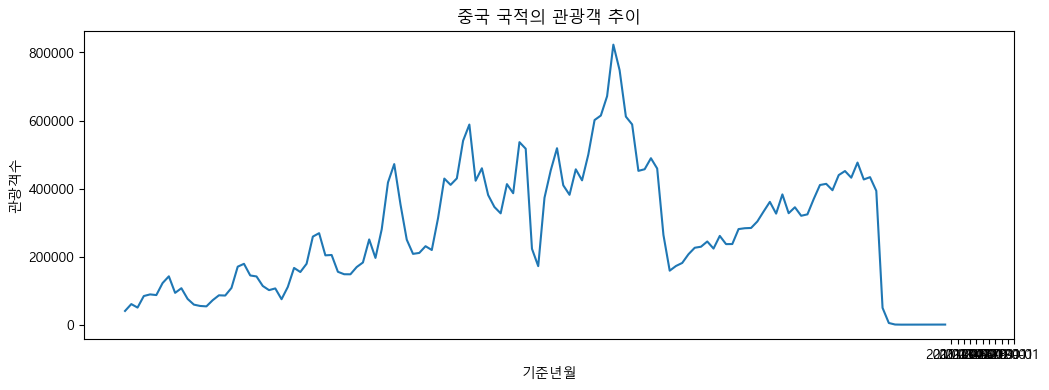

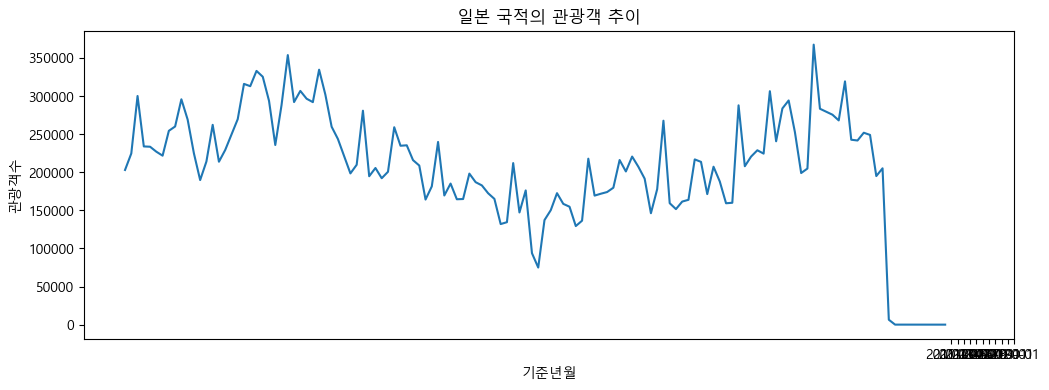

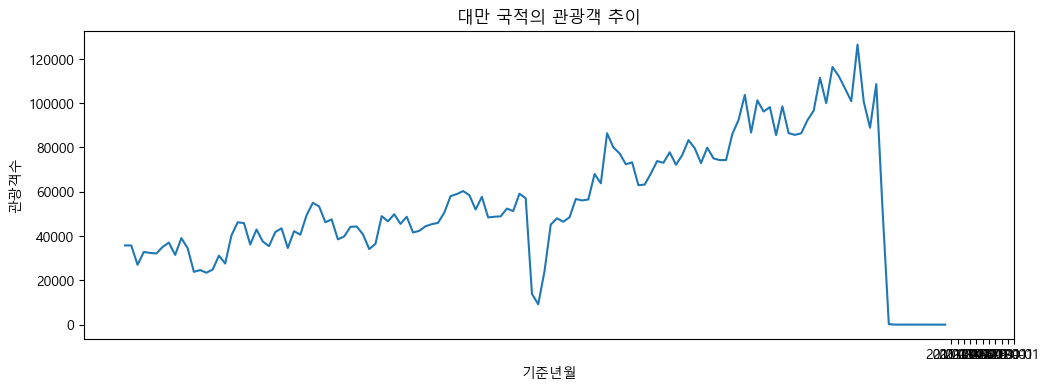

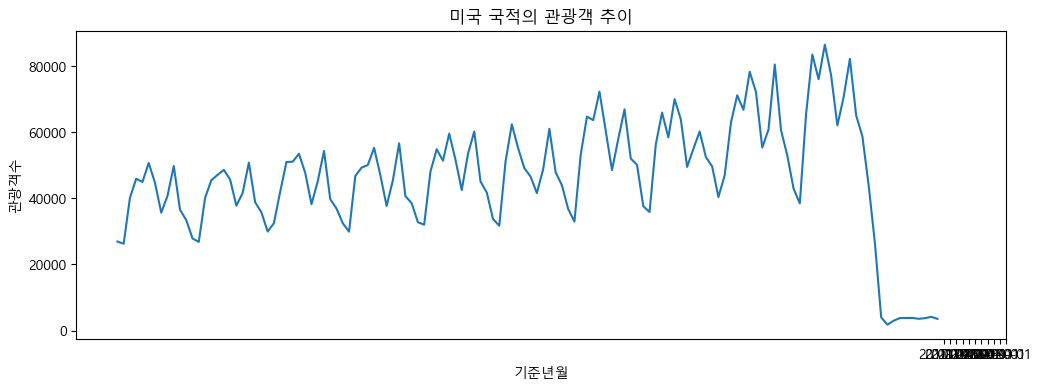

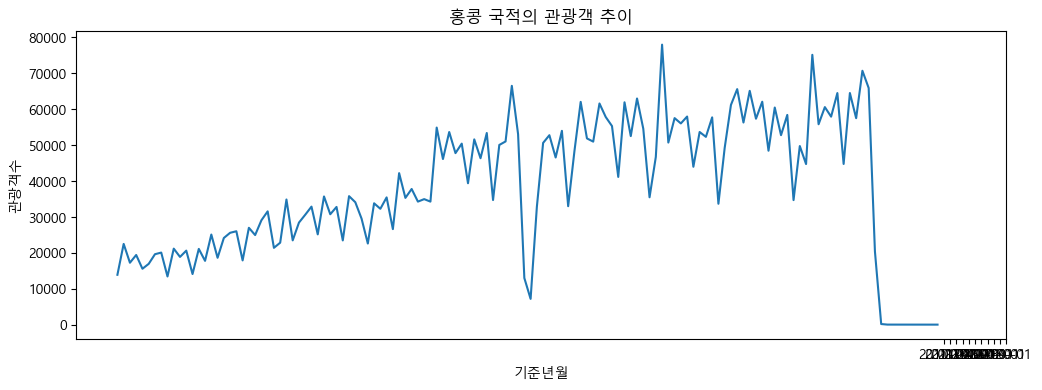

In [154]:
# 시계열 그래프 그리기 => 실습

# 우리나라 방문하는 외국인 관광객 중 상위 5개 국가 리스트 생성
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

for cntry in cntry_list: 
    condition = (df['국적'] == cntry) # 국적 관광객만 추출하기
    df_filter = df[condition] 
    plt.figure(figsize = (12, 4)) # 그래프 크기 조절
    plt.plot(df_filter['기준년월'], df_filter['관광'])  # 그래프 내용 설정
    # 그래프 타이틀, X축, Y축 이름 달기
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    
    # x 축 눈금 값 설정
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01','2018-01', '2019-01', '2020-01'])
   
    plt.show()
